# Ramsey King
# DSC 680 - Applied Data Science
# April 9 - 2022

###  This Jupyter file will perform the analysis for the author classification project.

In [20]:
# Load the author and speech text dataset, and necessary libraries to use.

import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv('talk_corpus.csv')
df.sample(30)

,Unnamed: 0,speaker,talks
153,153,gordon b hinckley,It is a great opportunity and a great privileg...
740,545,henry b eyring,All of us are blessed with responsibility for ...
328,133,neal a maxwell,What John and Paul wrote about God’s creations...
715,520,henry b eyring,My dear brethren who hold the priesthood of Go...
618,423,dallin h oaks,The restored gospel of Jesus Christ encourages...
237,42,russell m nelson,"My beloved brothers, sisters, and friends, we ..."
653,458,dallin h oaks,I bring you greetings from the Philippines Are...
465,270,gordon b hinckley,Thank you for that beautiful hymn. Thank you f...
507,312,thomas s monson,"My dear brethren, I am honored by the privileg..."
476,281,gordon b hinckley,"My beloved brethren, I commend you, wherever y..."


In [21]:
# some data prep and cleaning is in order before getting to the analysis.

df.shape

(794, 3)

In [22]:
# removes talks that do not contain any speech information
df = df[df['talks'].str.contains('for this speech is unavailable')==False]
df.shape


(757, 3)

In [23]:
# In running the above code, realized that there is a speaker entitled "jeffery r and patricia t holland..." that needs to be
# assigned to jeffery r holland
df['speaker'] = df['speaker'].replace({'jeffrey r and patricia t holland_things learned together': 'jeffrey r holland'})
df['speaker'].value_counts()


gordon b hinckley    127
henry b eyring       123
russell m nelson     120
dallin h oaks        117
thomas s monson      109
jeffrey r holland     85
neal a maxwell        76
Name: speaker, dtype: int64

In [24]:
# text processing can begin now.  Punctuation removal, lemmatisation, stop word removal will all take place here.

# Lowercase text
df['talks'] = df['talks'].apply(lambda x: x.lower())

In [25]:
# punctuation removal
df['talks'] = df['talks'].str.replace(r'[^\w\s]+', '')
df.sample(15)

C:\Users\ramse\AppData\Local\Temp/ipykernel_11788/1531123599.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['talks'] = df['talks'].str.replace(r'[^\w\s]+', '')


,Unnamed: 0,speaker,talks
154,154,thomas s monson,you are a glorious group even a chosen generat...
166,166,russell m nelson,the title of my message tonight is reflection ...
622,427,dallin h oaks,we note that the statistical report which has ...
110,110,gordon b hinckley,my beloved friends its a very genuine pleasure...
265,70,russell m nelson,recently i observed young men who attracted at...
639,444,dallin h oaks,our heavenly father has given his children two...
294,99,russell m nelson,unitedly we thank the almighty for the wondrou...
14,14,henry b eyring,finding our way backi want to talk with you ab...
632,437,dallin h oaks,i at this conference we have seen the release ...
555,360,thomas s monson,how good it is my beloved brothers and sisters...


In [26]:
# tokenization of the speeches into sentences.
import nltk
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df['sentence_tokenize'] = df['talks'].apply(lambda x: sent_tokenize(x))

In [27]:
# tokenization of the speeches into words
from nltk.tokenize import word_tokenize
df['word_tokenize'] = df['talks'].apply(lambda x: word_tokenize(x))

In [28]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
data = []

for i in range(df.shape[0]):
    text = df.iloc[i,4]
    talk_processed_list = []
    for word in text:
        if word not in set(stopwords.words('english')):
            talk_processed_list.append(stemmer.stem(word))
    proc_talk = " ".join(talk_processed_list)
    data.append(proc_talk)

print(data[1], len(data))

colleen appreci invit presid lee tonight yet invent better word express wellworn wordsthank youalthough juxtapos adverb henc major purpos tonight simpli grate say thank much done yet accomplish purpos brigham young univers special universitysinc speak faculti tomorrow afternoon matter appropri occas remark somewhat differ especi includ appreci serv import staff function special guest retire staff less herald word book mormon like helaman certainli less servic caus see alma 4819in contrast valu nurtur byu shouldnt surpris mani countertrend toward deperson today world global societi last day prophesi love mani shall wax cold matthew 2412 furthermor peac shall taken earth dc 135 even war within well nation accompani gener escal violenc confront also see prophesi despair cometh iniqu live age iniqu shall abound moroni 1022 matthew 2412 regrett soberingli foretel one brother sister see secular rescu column horizonther mani less dramat express forego trend gener societi abandon person bureau

In [19]:
# pos
import nltk
# nltk.download('averaged_perceptron_tagger')

df['word_pos'] = df['word_tokenize'].apply(lambda x: nltk.pos_tag(x))

In [29]:
# adapted from CharlesRajendran TextClassification github

# creating the feature matrix
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(data).toarray()
y = df.iloc[:, 1]
print(X.shape, y)

(757, 1000) 2         henry b eyring
4         neal a maxwell
7      gordon b hinckley
8      gordon b hinckley
10         dallin h oaks
             ...        
789       henry b eyring
790       henry b eyring
791       henry b eyring
792       henry b eyring
793       henry b eyring
Name: speaker, Length: 757, dtype: object


In [30]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7)

In [31]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [32]:
# predict class
y_pred = classifier.predict(X_test)

In [33]:
# Confusion matrix, classification report, accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(cm)
print()
print(cr)
print()
print(accuracy)

[[23  2  1  3  0  3  1]
 [ 0 18  0  4  0  0  3]
 [ 2  1 24  1  0  1  7]
 [ 2  1  0 13  0  1  4]
 [ 1  0  1  0 23  2  0]
 [ 4  1  1  1  1 14  1]
 [ 0  5  1  0  0  2 17]]

                   precision    recall  f1-score   support

    dallin h oaks       0.72      0.70      0.71        33
gordon b hinckley       0.64      0.72      0.68        25
   henry b eyring       0.86      0.67      0.75        36
jeffrey r holland       0.59      0.62      0.60        21
   neal a maxwell       0.96      0.85      0.90        27
 russell m nelson       0.61      0.61      0.61        23
  thomas s monson       0.52      0.68      0.59        25

         accuracy                           0.69       190
        macro avg       0.70      0.69      0.69       190
     weighted avg       0.71      0.69      0.70       190


0.6947368421052632


In [34]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(cm)
print()
print(cr)
print()
print(accuracy)

[[28  0  1  0  0  4  0]
 [ 0 25  0  0  0  0  0]
 [ 1  0 33  0  0  1  1]
 [ 0  0  0 19  0  0  2]
 [ 0  0  0  1 26  0  0]
 [ 3  0  0  0  0 20  0]
 [ 0  0  2  1  0  3 19]]

                   precision    recall  f1-score   support

    dallin h oaks       0.88      0.85      0.86        33
gordon b hinckley       1.00      1.00      1.00        25
   henry b eyring       0.92      0.92      0.92        36
jeffrey r holland       0.90      0.90      0.90        21
   neal a maxwell       1.00      0.96      0.98        27
 russell m nelson       0.71      0.87      0.78        23
  thomas s monson       0.86      0.76      0.81        25

         accuracy                           0.89       190
        macro avg       0.90      0.89      0.89       190
     weighted avg       0.90      0.89      0.90       190


0.8947368421052632


i am grateful to be with you those who speak to you sometimes ask for your prayers to sustain them in their efforts i ask that of you tonight with a special urgency and for a specific purposeyears ago i served as the bishop of a ward composed of young people time has wiped away much of what i learned then of their sorrows and mistakes but i can still see in my mind most of their faces i meet some of them as i travel about the world their faces and their physiques have been changed enough by time that i sometimes stumble trying to remember names others i have followed more closely with a chance to know what life has offered them when i learn of their lives i am amazed at the variety of their experiences each life seems to be unique about all they have in common as nearly as i can tell is that they have been surprised by the pattern of the tests of their faith the surprise has come because they could not know when the tests would come what they would be nor how long they would lastfor a 

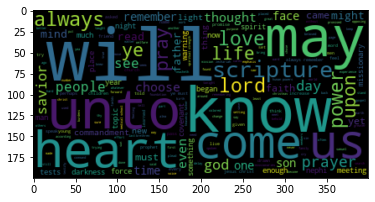

colleen and i appreciate the invitation from president lee to be with all of you tonight we have yet to invent better words than those expressive but wellworn wordsthank youalthough we can juxtapose adverbs hence my major purpose in being with you tonight is simply but gratefully to say thank you very much for all you have done are doing and will yet do in accomplishing the purposes of brigham young university a special universitysince i will be speaking to the faculty tomorrow afternoon on matters appropriate to that occasion these remarks will be somewhat different i especially include appreciation to those of you who serve in important staff and other functions and to our special guests the retirees staff are less heralded but in the words of the book of mormon like helaman you are certainly no less serviceable in the cause see alma 4819in contrast while we value nurturing at byu we shouldnt be surprised that there are so many countertrends toward depersonalization in todays world o

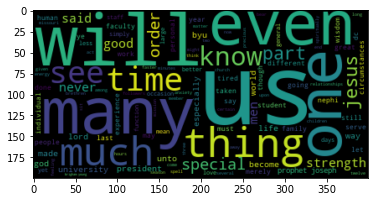

good evening brothers and sisters youre really quite a picture as i see you heretremendous a very remarkable group i suppose that most of you have been fasting today i would suppose that on this campus at least 20000 people have been fasting and that you have accompanied your fasting with earnest prayer i think thats a most remarkable phenomenon most of you i assume have fasted and prayed with a purposethat you might find answers to perplexing personal problems or the needs of others or that moisture might fall upon these arid western lands i hope you havent prayed for snow with the hope that you could go skiing on sundayi believe that the lord will hear our earnest supplications if we will back up our fasting and prayers with goodness in our lives to ancient israel he made a remarkable promise in these wordsif ye walk in my statutes and keep my commandments and do themthen i will give you rain in due season and the land shall yield her increase and the trees of the field shall yield t

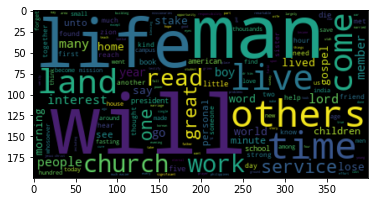

In [41]:
a = df['talks'].reset_index(drop=True)
b = df['speaker'].reset_index(drop=True)

wordcloud1 = WordCloud().generate(a[0])
wordcloud2 = WordCloud().generate(a[1])
wordcloud3 = WordCloud().generate(a[3])
print(a[0])
print(b[0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(a[1])
print(b[1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(a[3])
print(b[3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()